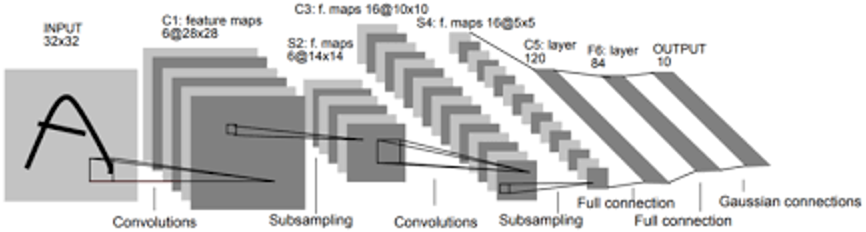

In [ ]:
import torch # pytorch
import numpy as np # numpy
import matplotlib.pyplot as plt # matplotlib
import pandas as pd # pandas

In [ ]:
#cpu
device = torch.device("cpu")

## MNIST

In [ ]:
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

mnist_transform = transforms.Compose ([   # 전처리 과정
    transforms.ToTensor(), # Tensor형식으로 바꿔준다.
    transforms.Normalize((0.5), (1.0))
])

#train dataset, test dataset

train_dataset = MNIST(root ='MNIST_data/', train= True, transform = mnist_transform, download = True)
test_dataset = MNIST(root ='MNIST_data/', train= False, transform = mnist_transform, download = True)

In [ ]:
# DataLoader

batch_size = 128

train_loader = DataLoader(dataset=train_dataset, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(dataset=test_dataset, batch_size = batch_size, shuffle = True)


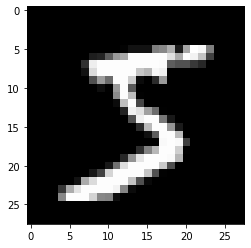

In [ ]:
img = train_dataset[0][0].numpy()
plt.imshow(img[0], cmap='gray')

## Fully connected 모델을 만들어보자

In [ ]:
from torch import nn

# nn.Sequential
  # convolution
  # fully connected
  # Relu
# -> 만들기 쉽지만 여러 다른 기능을 넣을 순 없다.

mnist_fc_model = nn.Sequential(
    
    nn.Flatten(),
    nn.Linear(in_features = 28*28*1, out_features=256),
    nn.Sigmoid(),
    nn.Linear(in_features = 256, out_features=10),
    nn.Softmax()
)


In [ ]:
mnist_fc_model

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): Sigmoid()
  (3): Linear(in_features=256, out_features=10, bias=True)
  (4): Softmax(dim=None)
)

In [ ]:
mnist_fc_model.to(device) # device = 'cpu'

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): Sigmoid()
  (3): Linear(in_features=256, out_features=10, bias=True)
  (4): Softmax(dim=None)
)

## device. 
## train_dataset -> transforms.ToTensor. 
 mnist_fc_model -> .to(deivice). 
  실제 학습이 일어나는 train을 만들 것

In [ ]:
from torch import optim

#train(model, 10) -> 형태를 사용할 수 있게끔 구현
def train(model, epochs) :
  # optimizer setting
  optimizer = optim.Adam(model.parameters(), lr=0.0001)
  
  # Loss function
  criterion = nn.CrossEntropyLoss() # classification 분류 -> 여러개 중에서 하나를 고르는 문제기 때문에

  for epoch in range(epochs) :
    model.train() # 모델을 train상태로 만들기
    train_accaracy = 0.0

    for batch_ind, samples in enumerate(train_loader) :
      x_t, y_t = samples

      #device로 x_t, y_t를 보냄
      x_t, y_t = x_t.to(device), y_t.to(device)

      #x_t를 넣어서 predicted
      pred = model(x_t)

      # predicted랑 y_t랑 비교 -> 둘의 차이(loss 계산)
      loss = criterion(pred, y_t)

      # loss 값을 가지고 back-propagation을 진행 -> weight값 업데이트
      # optimizer가 해줌
      optimizer.zero_grad() # optimizer 초기화
      loss.backward() # 역전파 실행
      optimizer.step()

    # accuary test for train dataset
    model.eval() # 모델을 평가 상태로 변경
    correct = 0
    for xx, yy in train_loader:
      data, target = xx.to(device), yy.to(device)
      pred = model(data) # pred [0, 0, 0.1, 0.2, 0.1 ... 0] -> 합이 1이 되도록 나타남(Softmax로 인해)
      _, predicted = torch.max(pred, 1)
      correct += predicted.eq(target.data).sum()

    print("train accuracy : ", (100 * correct / len(train_loader.dataset)).item())

In [ ]:
train(mnist_fc_model, 10)

train accuracy :  56.67166519165039
train accuracy :  64.44833374023438
train accuracy :  73.89833068847656
train accuracy :  81.11333465576172
train accuracy :  82.59166717529297
train accuracy :  83.21333312988281
train accuracy :  89.05500030517578
train accuracy :  90.07666778564453
train accuracy :  90.60333251953125
train accuracy :  91.00166320800781


In [ ]:
def get_n_params(model) :
  pp = 0
  for p in list(model.parameters()) :
    nn = 1
    for s in list(p.size()) :
      nn = nn*s
    pp += nn
  return pp


In [ ]:
get_n_params(mnist_fc_model)

203530

# CNN Model


In [ ]:
mnist_cnn_model = nn.Sequential(
    nn.Conv2d(in_channels = 1, out_channels = 4, kernel_size = 3, stride =1, padding = 0),
    nn.ReLU(),
    nn.Conv2d(in_channels = 4, out_channels = 8, kernel_size = 3, stride =1, padding = 0),
    nn.ReLU(),
    ## CNN 끝

    nn.Flatten(),
    nn.Linear(in_features = 24*24*8, out_features = 48),
    nn.ReLU(),
    nn.Linear(in_features =48, out_features = 10),
    nn.Softmax()
)

In [ ]:
get_n_params(mnist_cnn_model)

222058

In [ ]:
mnist_cnn_model

Sequential(
  (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1))
  (1): ReLU()
  (2): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1))
  (3): ReLU()
  (4): Flatten(start_dim=1, end_dim=-1)
  (5): Linear(in_features=4608, out_features=48, bias=True)
  (6): ReLU()
  (7): Linear(in_features=48, out_features=10, bias=True)
  (8): Softmax(dim=None)
)

In [ ]:
mnist_cnn_model.to(device)
train(mnist_cnn_model, 10)


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


train accuracy :  73.81500244140625
train accuracy :  75.78333282470703
train accuracy :  76.45333099365234
train accuracy :  76.76000213623047
train accuracy :  77.03666687011719
train accuracy :  77.36666870117188
train accuracy :  77.59666442871094
train accuracy :  77.711669921875
train accuracy :  77.86333465576172
train accuracy :  77.9800033569336


# Le-NET 5

In [ ]:
import torch.nn.functional as F
lenet = nn.Sequential(
    nn.Conv2d(in_channels = 1, out_channels = 6, kernel_size = 5, stride = 1), # 패딩을 없애줌
    nn.Tanh(), # 이때는 ReLU가 없었기 때문에 Tanh활성 함수를 사용하였다.
    nn.AvgPool2d(kernel_size = 2), # 평균 풀링 방법 사용

    nn.Conv2d(in_channels = 6, out_channels = 16, kernel_size = 5, stride = 1),
    nn.Tanh(),
    nn.AvgPool2d(kernel_size = 2),

    nn.Conv2d(in_channels = 16, out_channels = 120, kernel_size = 4, stride = 1),
    nn.Tanh(),
   
    nn.Flatten(),
    nn.Linear(in_features = 120, out_features = 84),
    nn.Tanh(),
    nn.Linear(in_features = 84, out_features = 10),
    nn.Softmax()
)

In [ ]:
get_n_params(lenet)

44426

In [ ]:
lenet.to(device)
train(lenet, 10)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


train accuracy :  81.50166320800781
train accuracy :  88.07333374023438
train accuracy :  89.98332977294922
train accuracy :  91.30166625976562
train accuracy :  92.21333312988281
train accuracy :  93.13166809082031
train accuracy :  93.80000305175781
train accuracy :  94.41500091552734
train accuracy :  94.92333221435547
train accuracy :  95.33499908447266
